In [1]:
# 📂 SIA-BI: Produção Ambulatorial Individualizada - Paraná - Foz do Iguaçu

## Introdução
# Este notebook utiliza o PySUS para baixar e explorar os dados do SIA-BI (Boletim Individualizado) para o município de Foz do Iguaçu.
# O objetivo é identificar registros da Atenção Primária com maior granularidade.

# 🔧 Instalação do PySUS
# Para garantir compatibilidade com o Google Colab, execute esta célula de instalação primeiro.
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# 🛑 Reinicialização obrigatória após instalação
# PT: Tempo de execução → Reiniciar ambiente
# EN: Runtime → Restart runtime


  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-y9vvltor
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-y9vvltor
  Resolved https://github.com/AlertaDengue/PySUS.git to commit 54f7800db4da5171d55e3446d638d64beeb8b149
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 k

In [33]:

from pysus.online_data.SIA import download
import pandas as pd

# Baixar dados do SIA para o estado do Paraná, ano de 2023, mês de janeiro, grupo BI
parquet_set = download('PR', 2023, 1, "BI")

# Verificar se o download foi bem-sucedido
if parquet_set:
    try:
        # Utilizando o método correto para transformar em DataFrame
        df_bi = parquet_set.to_dataframe()
        print("Dados carregados com sucesso:")
        display(df_bi.head())
    except Exception as e:
        print(f"Erro ao carregar os dados: {e}")
else:
    print("Nenhum arquivo encontrado para o período especificado.")



85185761it [00:00, 20145183700.12it/s]


Dados carregados com sucesso:


,CODUNI,GESTAO,CONDIC,UFMUN,TPUPS,TIPPRE,MN_IND,CNPJCPF,CNPJMNT,CNPJ_CC,...,RACACOR,MUNPAC,QT_APRES,QT_APROV,VL_APRES,VL_APROV,UFDIF,MNDIF,ETNIA,NAT_JUR
0,2731967,410550,PG,410550,04,00,M,01178931000147,01178931000147,00000000000000,...,01,411300,1,1,2.83,2.83,0,1,,1210
1,2731967,410550,PG,410550,04,00,M,01178931000147,01178931000147,00000000000000,...,01,412790,1,1,4.98,4.98,0,1,,1210
2,2731967,410550,PG,410550,04,00,M,01178931000147,01178931000147,00000000000000,...,01,410560,1,1,5.62,5.62,0,1,,1210
3,2733056,410550,PG,410550,02,00,M,76309806000128,76309806000128,00000000000000,...,01,410550,1,1,0.00,0.00,0,0,,1244
4,2733056,410550,PG,410550,02,00,M,76309806000128,76309806000128,00000000000000,...,01,410550,1,1,0.00,0.00,0,0,,1244


Top 10 Procedimentos Mais Realizados no SIA-BI:


,PROC_ID,QT_APROV
0,0301070075,209161
1,0301060118,193318
2,0301060096,162043
3,0302050027,104445
4,0301010072,82281
5,0803010125,69520
6,0301100209,67059
7,0203010086,46829
8,0301060029,45362
9,0301100039,38452


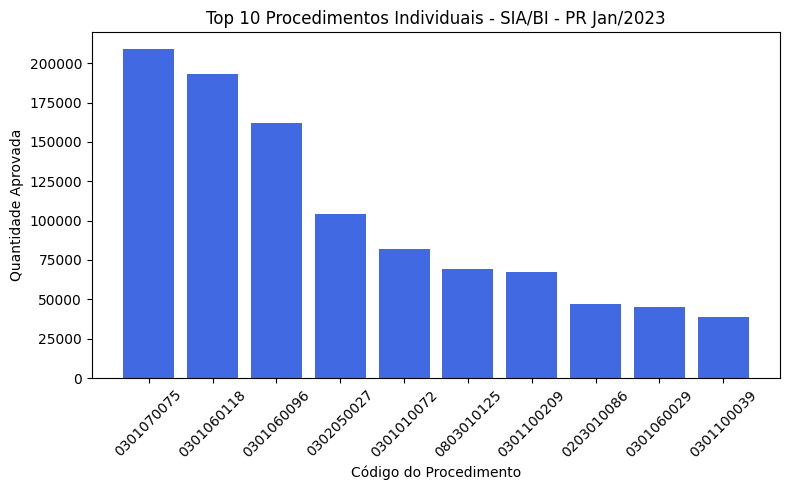

In [34]:
# 📊 Top 10 Procedimentos no SIA-BI

# Importação da biblioteca matplotlib.pyplot
import matplotlib.pyplot as plt

# Verificar se o DataFrame está carregado
if 'df_bi' in locals():
    try:
        # Conversão da coluna QT_APROV para inteiro (caso esteja como lista ou string)
        df_bi['QT_APROV'] = df_bi['QT_APROV'].astype(str).apply(lambda x: sum(map(int, x.split())))

        # Agrupar por código do procedimento e somar as quantidades aprovadas
        top_proc = (
            df_bi.groupby('PROC_ID')['QT_APROV']
            .sum()
            .sort_values(ascending=False)
            .head(10)
            .reset_index()
        )

        # Exibir os 10 procedimentos mais realizados
        print("Top 10 Procedimentos Mais Realizados no SIA-BI:")
        display(top_proc)

        # Gráfico dos 10 procedimentos mais realizados
        plt.figure(figsize=(8, 5))
        plt.bar(top_proc['PROC_ID'].astype(str), top_proc['QT_APROV'], color='royalblue')
        plt.title('Top 10 Procedimentos Individuais - SIA/BI - PR Jan/2023')
        plt.xlabel('Código do Procedimento')
        plt.ylabel('Quantidade Aprovada')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except KeyError as e:
        print(f"Erro: Coluna não encontrada - {e}")
    except Exception as e:
        print(f"Erro ao calcular os procedimentos: {e}")
else:
    print("O DataFrame 'df_bi' não está carregado.")


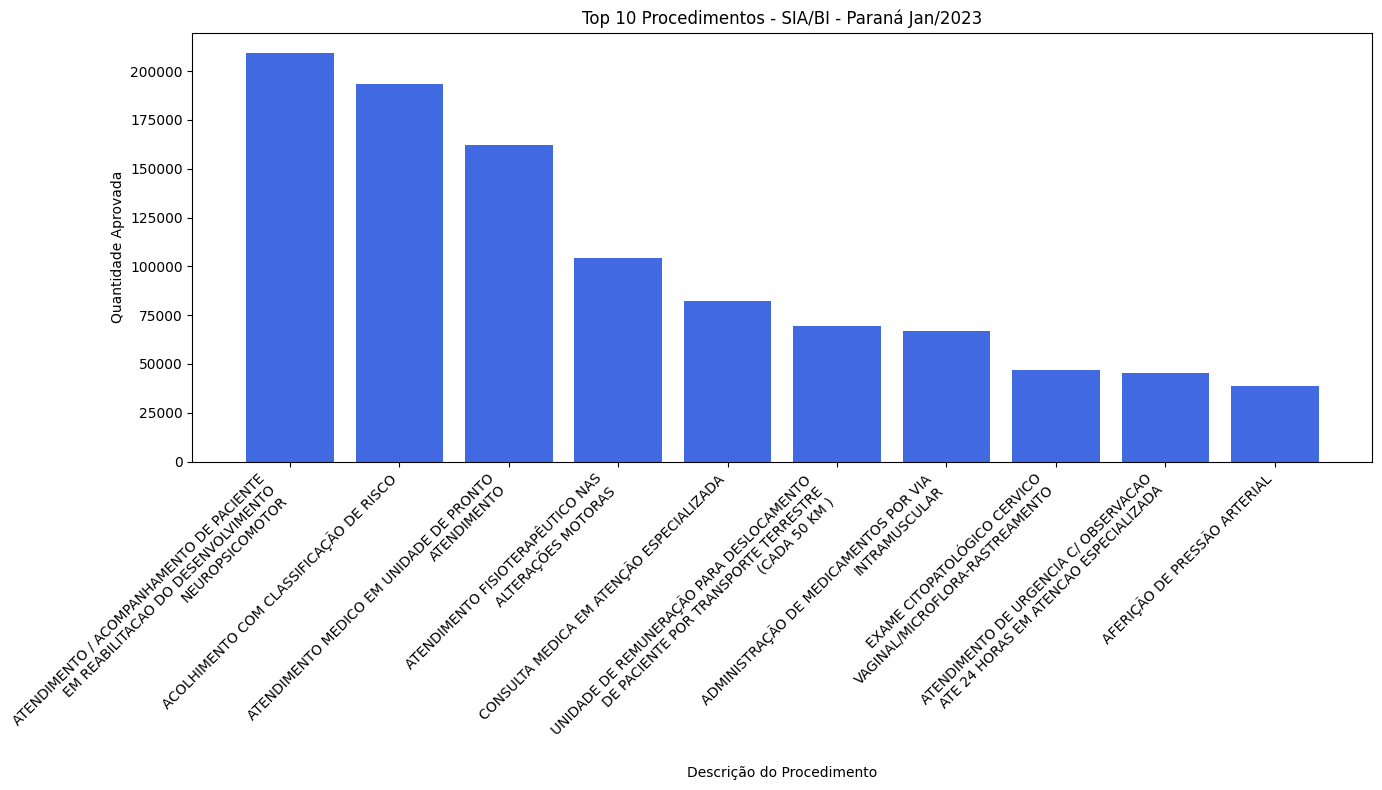

In [35]:
# 📊 Gráfico dos Top 10 Procedimentos - SIA/BI - Paraná

# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Função para quebrar a descrição em várias linhas de forma mais organizada
def wrap_text(text, width=40):
    return "\n".join(textwrap.wrap(text, width))

# Verificar se o DataFrame está carregado
if 'df_bi' in locals():
    try:
        # Conversão da coluna QT_APROV para inteiro (caso esteja como lista ou string)
        df_bi['QT_APROV'] = df_bi['QT_APROV'].astype(str).apply(lambda x: sum(map(int, x.split())))

        # Agrupar por código do procedimento e somar as quantidades aprovadas
        top_proc = (
            df_bi.groupby('PROC_ID')['QT_APROV']
            .sum()
            .sort_values(ascending=False)
            .head(10)
            .reset_index()
        )

        # Carregar o dicionário de procedimentos (SIGTAP)
        sigtap_url = 'https://raw.githubusercontent.com/cartaproale/PySUS/main/tabelas/tb_procedimento.txt'
        sigtap_df = pd.read_fwf(sigtap_url, widths=[10, 120], names=['PROC_ID', 'DESCRICAO'], encoding='latin1', dtype=str)

        # Criar um dicionário para mapeamento
        sigtap_dict = dict(zip(sigtap_df['PROC_ID'], sigtap_df['DESCRICAO']))

        # Mapear os códigos dos procedimentos para suas descrições
        top_proc['DESCRICAO'] = top_proc['PROC_ID'].astype(str).map(sigtap_dict)

        # 📊 Gráfico dos 10 Procedimentos Mais Realizados - Paraná (com descrições aprimoradas)
        plt.figure(figsize=(14, 8))

        # Quebrar as descrições longas para melhor visualização
        descriptions_wrapped = top_proc['DESCRICAO'].apply(lambda x: wrap_text(x, 40))

        # Plotar o gráfico
        plt.bar(descriptions_wrapped, top_proc['QT_APROV'], color='royalblue')
        plt.title('Top 10 Procedimentos - SIA/BI - Paraná Jan/2023')
        plt.xlabel('Descrição do Procedimento')
        plt.ylabel('Quantidade Aprovada')
        plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajuste da rotação e do tamanho da fonte
        plt.tight_layout()
        plt.show()

    except KeyError as e:
        print(f"Erro: Coluna não encontrada - {e}")
    except Exception as e:
        print(f"Erro ao calcular ou mapear os procedimentos: {e}")
else:
    print("O DataFrame 'df_bi' não está carregado.")


<ipython-input-36-cdbdea54fe59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foz['QT_APROV'] = df_foz['QT_APROV'].astype(str).apply(lambda x: sum(map(int, x.split())))


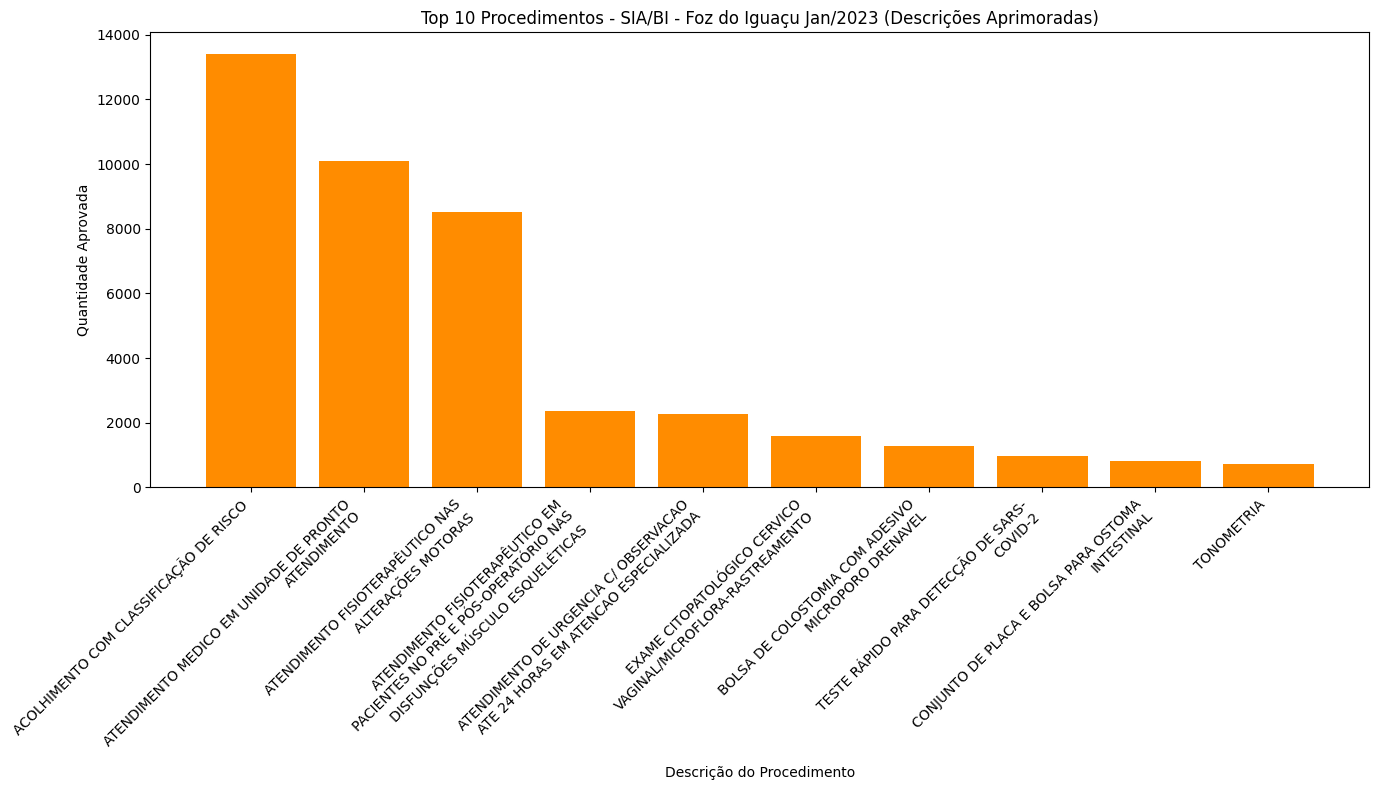

In [36]:
# 📊 Gráfico dos Top 10 Procedimentos - SIA/BI - Foz do Iguaçu

# Verificar se o DataFrame está carregado
if 'df_bi' in locals():
    try:
        # Filtrar os procedimentos realizados exclusivamente em Foz do Iguaçu (código do município 410830)
        df_foz = df_bi[df_bi['MUNPAC'] == '410830']

        # Conversão da coluna QT_APROV para inteiro (caso esteja como lista ou string)
        df_foz['QT_APROV'] = df_foz['QT_APROV'].astype(str).apply(lambda x: sum(map(int, x.split())))

        # Agrupar por código do procedimento e somar as quantidades aprovadas
        top_proc_foz = (
            df_foz.groupby('PROC_ID')['QT_APROV']
            .sum()
            .sort_values(ascending=False)
            .head(10)
            .reset_index()
        )

        # Mapear os códigos dos procedimentos para suas descrições
        top_proc_foz['DESCRICAO'] = top_proc_foz['PROC_ID'].astype(str).map(sigtap_dict)

        # 📊 Gráfico dos 10 Procedimentos Mais Realizados - Foz do Iguaçu (com descrições aprimoradas)
        plt.figure(figsize=(14, 8))

        # Quebrar as descrições longas para melhor visualização
        descriptions_wrapped_foz = top_proc_foz['DESCRICAO'].apply(lambda x: wrap_text(x, 40))

        # Plotar o gráfico
        plt.bar(descriptions_wrapped_foz, top_proc_foz['QT_APROV'], color='darkorange')
        plt.title('Top 10 Procedimentos - SIA/BI - Foz do Iguaçu Jan/2023 (Descrições Aprimoradas)')
        plt.xlabel('Descrição do Procedimento')
        plt.ylabel('Quantidade Aprovada')
        plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajuste da rotação e do tamanho da fonte
        plt.tight_layout()
        plt.show()

    except KeyError as e:
        print(f"Erro: Coluna não encontrada - {e}")
    except Exception as e:
        print(f"Erro ao calcular ou mapear os procedimentos: {e}")
else:
    print("O DataFrame 'df_bi' não está carregado.")


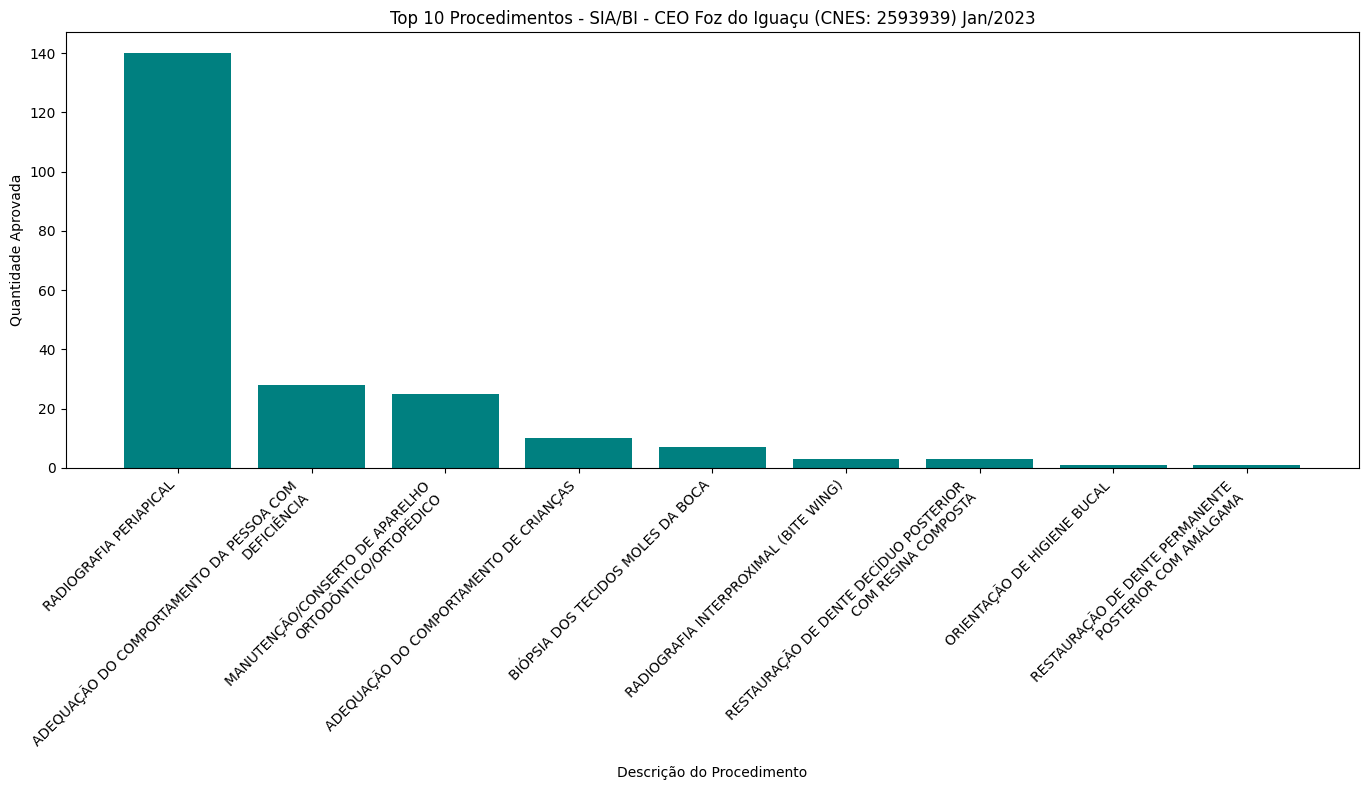

In [38]:
# 📊 Gráfico dos Top 10 Procedimentos - SIA/BI - CEO Foz do Iguaçu (CNES: 2593939)

# Verificar se o DataFrame está carregado
if 'df_bi' in locals():
    try:
        # Filtrar os procedimentos realizados na unidade de saúde com CNES 2593939 (CEO Foz do Iguaçu)
        df_ceo = df_bi.loc[df_bi['CODUNI'] == '2593939'].copy()

        # Verificar se há dados suficientes
        if df_ceo.empty:
            print("Nenhum dado encontrado para o CEO de Foz do Iguaçu (CNES: 2593939).")
        else:
            # Conversão da coluna QT_APROV para inteiro (caso esteja como lista ou string)
            df_ceo['QT_APROV'] = df_ceo['QT_APROV'].astype(str).apply(lambda x: sum(map(int, x.split())))

            # Agrupar por código do procedimento e somar as quantidades aprovadas
            top_proc_ceo = (
                df_ceo.groupby('PROC_ID')['QT_APROV']
                .sum()
                .sort_values(ascending=False)
                .head(10)
                .reset_index()
            )

            # Mapear os códigos dos procedimentos para suas descrições
            top_proc_ceo['DESCRICAO'] = top_proc_ceo['PROC_ID'].astype(str).map(sigtap_dict)

            # 📊 Gráfico dos 10 Procedimentos Mais Realizados - CEO Foz do Iguaçu
            plt.figure(figsize=(14, 8))

            # Quebrar as descrições longas para melhor visualização
            descriptions_wrapped_ceo = top_proc_ceo['DESCRICAO'].apply(lambda x: wrap_text(x, 40))

            # Plotar o gráfico
            plt.bar(descriptions_wrapped_ceo, top_proc_ceo['QT_APROV'], color='teal')
            plt.title('Top 10 Procedimentos - SIA/BI - CEO Foz do Iguaçu (CNES: 2593939) Jan/2023')
            plt.xlabel('Descrição do Procedimento')
            plt.ylabel('Quantidade Aprovada')
            plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajuste da rotação e do tamanho da fonte
            plt.tight_layout()
            plt.show()
    except KeyError as e:
        print(f"Erro: Coluna não encontrada - {e}")
    except Exception as e:
        print(f"Erro ao calcular ou mapear os procedimentos: {e}")
else:
    print("O DataFrame 'df_bi' não está carregado.")
